In [1]:
import pickle
import os
from pathlib import Path

In [2]:
cd ../test_data

/Users/sashi/repos/ThinkChipBackend/test_data


In [3]:
ls

SingleBlinksData/
[f]aditya_eyes_closed|151019_144531.pickle
[f]aditya_work|151019_150218.pickle
[f]facebook|141019_160022.pickle
[f]hcl_1|111019_142206.pickle
[f]social_media|111019_153856.pickle
call_of_duty.pickle
facebook.pickle
raghav_eyes_closed/
raghav_work/
sashi_eyes_closed/
sashi_work/


In [4]:
eyes_closed = os.listdir('raghav_eyes_closed/')
work = os.listdir('raghav_work/')
print(list(enumerate(eyes_closed)))
print(list(enumerate(work)))

[(0, '[f]eyes_closed|141019_160513.pickle'), (1, '[f]raghav_eyes_closed_1|111019_121756.pickle'), (2, '[f]raghav_eyes_closed_2|111019_122051.pickle'), (3, '[f]raghav_eyes_closed_3|111019_122407.pickle'), (4, '[f]raghavendra_eyes_closed|151019_162800.pickle'), (5, 'README.md')]
[(0, '[f]assignment|141019_190516.pickle'), (1, '[f]ragavendra_attention|171019_133116.pickle'), (2, '[f]reading_research_paper_1|111019_145415.pickle'), (3, '[f]reading_research_paper_1|111019_150922.pickle')]


In [5]:
# Setting data directory paths
eyes_closed_data = []
work_data = []
eyes_closed_folder = Path('raghav_eyes_closed/')
work_folder = Path('raghav_work/')

# Loading Eyes closed data from all files and appending to eyes_closed_data
for filename in eyes_closed:
    if 'pickle' in filename:
        with open(eyes_closed_folder/filename, 'rb') as f:
            eyes_closed_data.append(pickle.load(f))

# Loading work data from all files and appending to work data
for filename in work:
    if 'pickle' in filename:
        with open(work_folder/filename, 'rb') as f:
            work_data.append(pickle.load(f))
            
print(f"Lenght of eyes_closed: {len(eyes_closed)}")
print(f"Lenght of work: {len(work)}")

Lenght of eyes_closed: 6
Lenght of work: 4


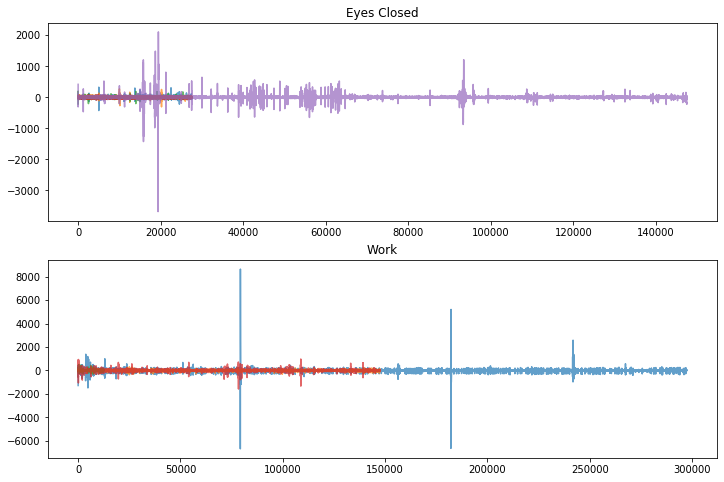

In [6]:
# Plot the filtered (DC and 50Hz notch) data without removing bad epochs
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(2,1, figsize=(12,8))

for dt in eyes_closed_data:
    ax[0].plot(dt[10:,0,:].reshape(-1), alpha=0.7)
    ax[0].set_title('Eyes Closed')

for dt in work_data:
    ax[1].plot(dt[10:,0,:].reshape(-1), alpha=0.7)
    ax[1].set_title('Work')

In [7]:
import sys
sys.path.append('../')

In [8]:
from features import feature_removal as fr

Using config.dataReader - random number


In [9]:
# Removing bad epochs containing eye blinks
import config
config.reset_filter_states() # Why do we need to reset filter states?

eyes_closed_data_clean = []
work_data_clean = []

print("Removing bad epochs from eyes closed data")
for i, dt in enumerate(eyes_closed_data):
    config.reset_filter_states()
    eyes_closed_data_clean.append(fr.remove_bad_epochs(dt,fr.energy_of_epoch,threshold=100))
    
print("Removing bad epochs from work data")
for i, dt in enumerate(work_data):
    config.reset_filter_states()
    work_data_clean.append(fr.remove_bad_epochs(dt,fr.energy_of_epoch,threshold=100))


Removing bad epochs from eyes closed data
CONSOLE: ENEGERGY: 8082491.410735075
CONSOLE: ENEGERGY: 1153525.6103026504
CONSOLE: ENEGERGY: 88185.43468963858
CONSOLE: ENEGERGY: 8053.278312572166
CONSOLE: ENEGERGY: 414.36167468276386
CONSOLE: ENEGERGY: 209.43099614105333
CONSOLE: ENEGERGY: 269.8868924731212
CONSOLE: ENEGERGY: 33.79147863596153
CONSOLE: ENEGERGY: 1399.1541389443646
CONSOLE: ENEGERGY: 4658.359292125154
CONSOLE: ENEGERGY: 18427.12073278502
CONSOLE: ENEGERGY: 9289.876820120144
CONSOLE: ENEGERGY: 100725.92655311596
CONSOLE: ENEGERGY: 45424.07768273074
CONSOLE: ENEGERGY: 13772.158424140054
CONSOLE: ENEGERGY: 915.7545040900033
CONSOLE: ENEGERGY: 126.97862023468112
CONSOLE: ENEGERGY: 140.1504044589929
CONSOLE: ENEGERGY: 52.60799962103191
CONSOLE: ENEGERGY: 47.10244706803573
CONSOLE: ENEGERGY: 27.64522809885479
CONSOLE: ENEGERGY: 53.059590689924036
CONSOLE: ENEGERGY: 16.370007575040137
CONSOLE: ENEGERGY: 54.94565433734494
CONSOLE: ENEGERGY: 45.509840124593254
CONSOLE: ENEGERGY: 46.3

CONSOLE: ENEGERGY: 3236909.8177441377
CONSOLE: ENEGERGY: 567890.3110326668
CONSOLE: ENEGERGY: 38421.79279411169
CONSOLE: ENEGERGY: 2210.614948437511
CONSOLE: ENEGERGY: 326.63796899926916
CONSOLE: ENEGERGY: 103.71427612230487
CONSOLE: ENEGERGY: 450.9731283566797
CONSOLE: ENEGERGY: 1012.9617990680413
CONSOLE: ENEGERGY: 800.9910551042224
CONSOLE: ENEGERGY: 596.3368461447209
CONSOLE: ENEGERGY: 493.7323713228564
CONSOLE: ENEGERGY: 198.3476805904218
CONSOLE: ENEGERGY: 112.6973657401887
CONSOLE: ENEGERGY: 60.35251197219049
CONSOLE: ENEGERGY: 51.623967377599975
CONSOLE: ENEGERGY: 37.47144244668058
CONSOLE: ENEGERGY: 96.90181978036458
CONSOLE: ENEGERGY: 71.96024450927885
CONSOLE: ENEGERGY: 50.56270745173785
CONSOLE: ENEGERGY: 47.180044174783454
CONSOLE: ENEGERGY: 25.75433357437895
CONSOLE: ENEGERGY: 84.09171018023079
CONSOLE: ENEGERGY: 154.13774250705455
CONSOLE: ENEGERGY: 51.44486973467827
CONSOLE: ENEGERGY: 16.11580241561119
CONSOLE: ENEGERGY: 15.088209954145086
CONSOLE: ENEGERGY: 36.34447694

CONSOLE: ENEGERGY: 2109006.1879704227
CONSOLE: ENEGERGY: 338133.2121041954
CONSOLE: ENEGERGY: 50301.462974235365
CONSOLE: ENEGERGY: 3374.307708438417
CONSOLE: ENEGERGY: 160.6919686475319
CONSOLE: ENEGERGY: 295.1607570872093
CONSOLE: ENEGERGY: 58.434129953832105
CONSOLE: ENEGERGY: 37.96875360173501
CONSOLE: ENEGERGY: 55.307684066508465
CONSOLE: ENEGERGY: 50.683545234126385
CONSOLE: ENEGERGY: 93.33736523392646
CONSOLE: ENEGERGY: 58.80169400013732
CONSOLE: ENEGERGY: 53.22665515131843
CONSOLE: ENEGERGY: 22.116258757915496
CONSOLE: ENEGERGY: 58.51553123979649
CONSOLE: ENEGERGY: 68.96177881017391
CONSOLE: ENEGERGY: 113.02679458537611
CONSOLE: ENEGERGY: 47.11534716459745
CONSOLE: ENEGERGY: 37.95860231788809
CONSOLE: ENEGERGY: 45.551666995556005
CONSOLE: ENEGERGY: 32.28642567745564
CONSOLE: ENEGERGY: 48.11701544380208
CONSOLE: ENEGERGY: 38.523836895676574
CONSOLE: ENEGERGY: 16.948635832764857
CONSOLE: ENEGERGY: 5.166273824727363
CONSOLE: ENEGERGY: 28.69513025323642
CONSOLE: ENEGERGY: 36.946589

CONSOLE: ENEGERGY: 2792035.8339777766
CONSOLE: ENEGERGY: 414645.4294874368
CONSOLE: ENEGERGY: 54107.87346561696
CONSOLE: ENEGERGY: 5324.80363927746
CONSOLE: ENEGERGY: 813.769007722804
CONSOLE: ENEGERGY: 1224.127621655088
CONSOLE: ENEGERGY: 1830.370997570452
CONSOLE: ENEGERGY: 361.8052540061724
CONSOLE: ENEGERGY: 87.66429265656728
CONSOLE: ENEGERGY: 53.42539777587945
CONSOLE: ENEGERGY: 39.7475864674175
CONSOLE: ENEGERGY: 92.64413558914224
CONSOLE: ENEGERGY: 93.42733734627507
CONSOLE: ENEGERGY: 52.301603770251354
CONSOLE: ENEGERGY: 37.92312310333671
CONSOLE: ENEGERGY: 35.10500845211698
CONSOLE: ENEGERGY: 52.983931716409046
CONSOLE: ENEGERGY: 80.0160183342295
CONSOLE: ENEGERGY: 69.56712005612124
CONSOLE: ENEGERGY: 36.23822724037287
CONSOLE: ENEGERGY: 98.47713486473623
CONSOLE: ENEGERGY: 39.719363971159694
CONSOLE: ENEGERGY: 31.877528832134757
CONSOLE: ENEGERGY: 36.00677834417468
CONSOLE: ENEGERGY: 13.939020929241117
CONSOLE: ENEGERGY: 67.74471111117515
CONSOLE: ENEGERGY: 11.79478712606407

CONSOLE: ENEGERGY: 567130.7418605998
CONSOLE: ENEGERGY: 178562.2716238782
CONSOLE: ENEGERGY: 17809.58800911033
CONSOLE: ENEGERGY: 2505.967339287189
CONSOLE: ENEGERGY: 359.27763264095876
CONSOLE: ENEGERGY: 79.13961524748025
CONSOLE: ENEGERGY: 94.01894279915425
CONSOLE: ENEGERGY: 95.26160557581025
CONSOLE: ENEGERGY: 197.12022310224688
CONSOLE: ENEGERGY: 719.859629365505
CONSOLE: ENEGERGY: 363.2807918976272
CONSOLE: ENEGERGY: 89.99931018831023
CONSOLE: ENEGERGY: 27.186489130951486
CONSOLE: ENEGERGY: 85.9134924449071
CONSOLE: ENEGERGY: 47.496437382772015
CONSOLE: ENEGERGY: 25.85162881741145
CONSOLE: ENEGERGY: 30.340737060457446
CONSOLE: ENEGERGY: 53.628721773223994
CONSOLE: ENEGERGY: 92.39518402850823
CONSOLE: ENEGERGY: 51.25582419324686
CONSOLE: ENEGERGY: 16.579087359057695
CONSOLE: ENEGERGY: 27.134845458611267
CONSOLE: ENEGERGY: 75.34921076713097
CONSOLE: ENEGERGY: 44.893235669246835
CONSOLE: ENEGERGY: 30.076675311772508
CONSOLE: ENEGERGY: 20.783695476597067
CONSOLE: ENEGERGY: 13.7918233

CONSOLE: ENEGERGY: 629395.9691791787
CONSOLE: ENEGERGY: 232400.11382239225
CONSOLE: ENEGERGY: 148906.3797423863
CONSOLE: ENEGERGY: 28821.10406496098
CONSOLE: ENEGERGY: 27873.704482290446
CONSOLE: ENEGERGY: 475618.48426325666
CONSOLE: ENEGERGY: 35443.39123279185
CONSOLE: ENEGERGY: 35605.08725771282
CONSOLE: ENEGERGY: 342910.9672065743
CONSOLE: ENEGERGY: 78589.11517951394
CONSOLE: ENEGERGY: 31820.955303718005
CONSOLE: ENEGERGY: 79533.2310344643
CONSOLE: ENEGERGY: 87045.6218153912
CONSOLE: ENEGERGY: 84073.10583489464
CONSOLE: ENEGERGY: 37755.36428553103
CONSOLE: ENEGERGY: 20529.557093180447
CONSOLE: ENEGERGY: 29649.837027137928
CONSOLE: ENEGERGY: 27536.669307781984
CONSOLE: ENEGERGY: 3267.477933246628
CONSOLE: ENEGERGY: 8129.426711566984
CONSOLE: ENEGERGY: 17877.323165754988
CONSOLE: ENEGERGY: 7865.557312914346
CONSOLE: ENEGERGY: 2388.6872700586096
CONSOLE: ENEGERGY: 2046.9542587796223
CONSOLE: ENEGERGY: 6705.656622771148
CONSOLE: ENEGERGY: 2400.8124242465774
CONSOLE: ENEGERGY: 3388.42361

CONSOLE: ENEGERGY: 94.67300482042512
CONSOLE: ENEGERGY: 4169.542291571036
CONSOLE: ENEGERGY: 1350.0017421527225
CONSOLE: ENEGERGY: 189.57696850551278
CONSOLE: ENEGERGY: 36.145123096883815
CONSOLE: ENEGERGY: 4962.884759293148
CONSOLE: ENEGERGY: 2132.002383732607
CONSOLE: ENEGERGY: 399.98627961295307
CONSOLE: ENEGERGY: 123.96708391909885
CONSOLE: ENEGERGY: 3290.5384224585296
CONSOLE: ENEGERGY: 3864.8785875319218
CONSOLE: ENEGERGY: 456.5635023050088
CONSOLE: ENEGERGY: 121.01320450412099
CONSOLE: ENEGERGY: 44.14058363958268
CONSOLE: ENEGERGY: 25.27441968571978
CONSOLE: ENEGERGY: 116.85663319230721
CONSOLE: ENEGERGY: 6295.499881523939
CONSOLE: ENEGERGY: 1197.183596797376
CONSOLE: ENEGERGY: 174.9443370383423
CONSOLE: ENEGERGY: 49.188893318322805
CONSOLE: ENEGERGY: 6572.0164305896815
CONSOLE: ENEGERGY: 1010.3444150158996
CONSOLE: ENEGERGY: 183.78383351178474
CONSOLE: ENEGERGY: 248.9395672607579
CONSOLE: ENEGERGY: 5445.494305564309
CONSOLE: ENEGERGY: 627.3817307462778
CONSOLE: ENEGERGY: 5451.8

CONSOLE: ENEGERGY: 94.29358780053587
CONSOLE: ENEGERGY: 353.4702807265158
CONSOLE: ENEGERGY: 599.7942648516706
CONSOLE: ENEGERGY: 5054.109845141525
CONSOLE: ENEGERGY: 731.5492003088725
CONSOLE: ENEGERGY: 618.8424865085219
CONSOLE: ENEGERGY: 271.85811344372917
CONSOLE: ENEGERGY: 154.46360776514334
CONSOLE: ENEGERGY: 2052.517440843826
CONSOLE: ENEGERGY: 1889.1179554845253
CONSOLE: ENEGERGY: 1849.769651974783
CONSOLE: ENEGERGY: 6255.160747327376
CONSOLE: ENEGERGY: 638.9872226547703
CONSOLE: ENEGERGY: 261.7704072542745
CONSOLE: ENEGERGY: 291.61779565951906
CONSOLE: ENEGERGY: 5368.940036218329
CONSOLE: ENEGERGY: 7240.402916997412
CONSOLE: ENEGERGY: 943.8024389281538
CONSOLE: ENEGERGY: 106.18163421029924
CONSOLE: ENEGERGY: 20.330102871662437
CONSOLE: ENEGERGY: 47.44199465362574
CONSOLE: ENEGERGY: 102.40842590767454
CONSOLE: ENEGERGY: 366.0919098209918
CONSOLE: ENEGERGY: 223.49507234477664
CONSOLE: ENEGERGY: 46.349458682324155
CONSOLE: ENEGERGY: 4.071163846283373
CONSOLE: ENEGERGY: 19.3488164

CONSOLE: ENEGERGY: 1107132.0110416936
CONSOLE: ENEGERGY: 335489.43800802215
CONSOLE: ENEGERGY: 24885.971948711078
CONSOLE: ENEGERGY: 1897.7635006639039
CONSOLE: ENEGERGY: 3135.2969538785587
CONSOLE: ENEGERGY: 2489.538348131488
CONSOLE: ENEGERGY: 1001.0541264062484
CONSOLE: ENEGERGY: 254.8093733421128
CONSOLE: ENEGERGY: 64.69114916351779
CONSOLE: ENEGERGY: 195.56524173207498
CONSOLE: ENEGERGY: 73.22760750822964
CONSOLE: ENEGERGY: 64.16970618119885
CONSOLE: ENEGERGY: 265.781138446795
CONSOLE: ENEGERGY: 1231.656252285299
CONSOLE: ENEGERGY: 280.1334633265186
CONSOLE: ENEGERGY: 305.9760307969691
CONSOLE: ENEGERGY: 8431.260168772162
CONSOLE: ENEGERGY: 12125.790781473373
CONSOLE: ENEGERGY: 6684.3688534481635
CONSOLE: ENEGERGY: 3594.190033438364
CONSOLE: ENEGERGY: 1214.456178526952
CONSOLE: ENEGERGY: 3075.8991960369217
CONSOLE: ENEGERGY: 12847.079667948068
CONSOLE: ENEGERGY: 3296.49325819143
CONSOLE: ENEGERGY: 4331.271767824158
CONSOLE: ENEGERGY: 844.2114699453069
CONSOLE: ENEGERGY: 499.789414

In [10]:
print("Shapes for clean eyes closed data:")
for d in eyes_closed_data_clean:
    print(d.shape)
    
print("Shapes for clean work data:")
for d in work_data_clean:
    print(d.shape)


Shapes for clean eyes closed data:
(171, 1, 250)
(220, 1, 250)
(218, 1, 250)
(225, 1, 250)
(1016, 1, 250)
Shapes for clean work data:
(909, 1, 250)
(755, 1, 250)
(40, 1, 250)
(388, 1, 250)


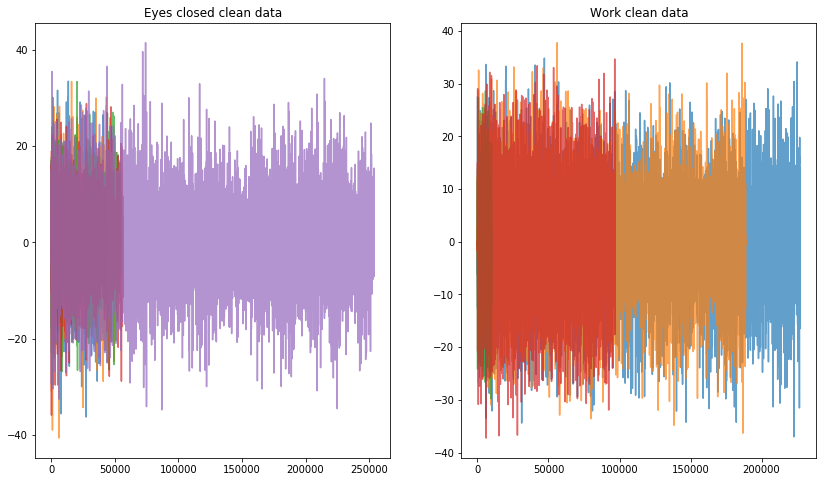

In [11]:
#Plotting data after removing bad epochs
fig, ax = plt.subplots(1,2,figsize=(14,8))

for d in eyes_closed_data_clean:
    ax[0].plot(d.squeeze().reshape(-1),alpha=0.7)
    ax[0].set_title("Eyes closed clean data")
for d in work_data_clean:
    ax[1].plot(d.squeeze().reshape(-1),alpha=0.7)
    ax[1].set_title("Work clean data")

In [12]:
from features import *

In [13]:
# Get band energy for all files and put in a list
eyes_closed_bandpower = []
work_bandpower = []

# Get band energy for eyes close
for o in eyes_closed_data_clean:
    bandp = []
    for d in o:
        bandp.append(get_bandpower(d.reshape(1,d.shape[0],d.shape[1])))
    eyes_closed_bandpower.append(np.array(bandp))

# Get band energy for work
for o in work_data_clean:
    bandp = []
    for d in o:
        bandp.append(get_bandpower(d.reshape(1,d.shape[0],d.shape[1])))
    work_bandpower.append(np.array(bandp))

print(f"length of eyes closed band energy list: {len(eyes_closed_bandpower)}")
print(f"length of work band energy list: {len(work_bandpower)}")

/usr/local/lib/python3.7/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 500 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


length of eyes closed band energy list: 5
length of work band energy list: 4


In [14]:
print("Shapes for band energy eyes closed data:")
for d in eyes_closed_bandpower:
    print(d.shape)
    
print("Shapes of band energy work data:")
for d in work_bandpower:
    print(d.shape)


Shapes for band energy eyes closed data:
(171, 1, 5)
(220, 1, 5)
(218, 1, 5)
(225, 1, 5)
(1016, 1, 5)
Shapes of band energy work data:
(909, 1, 5)
(755, 1, 5)
(40, 1, 5)
(388, 1, 5)


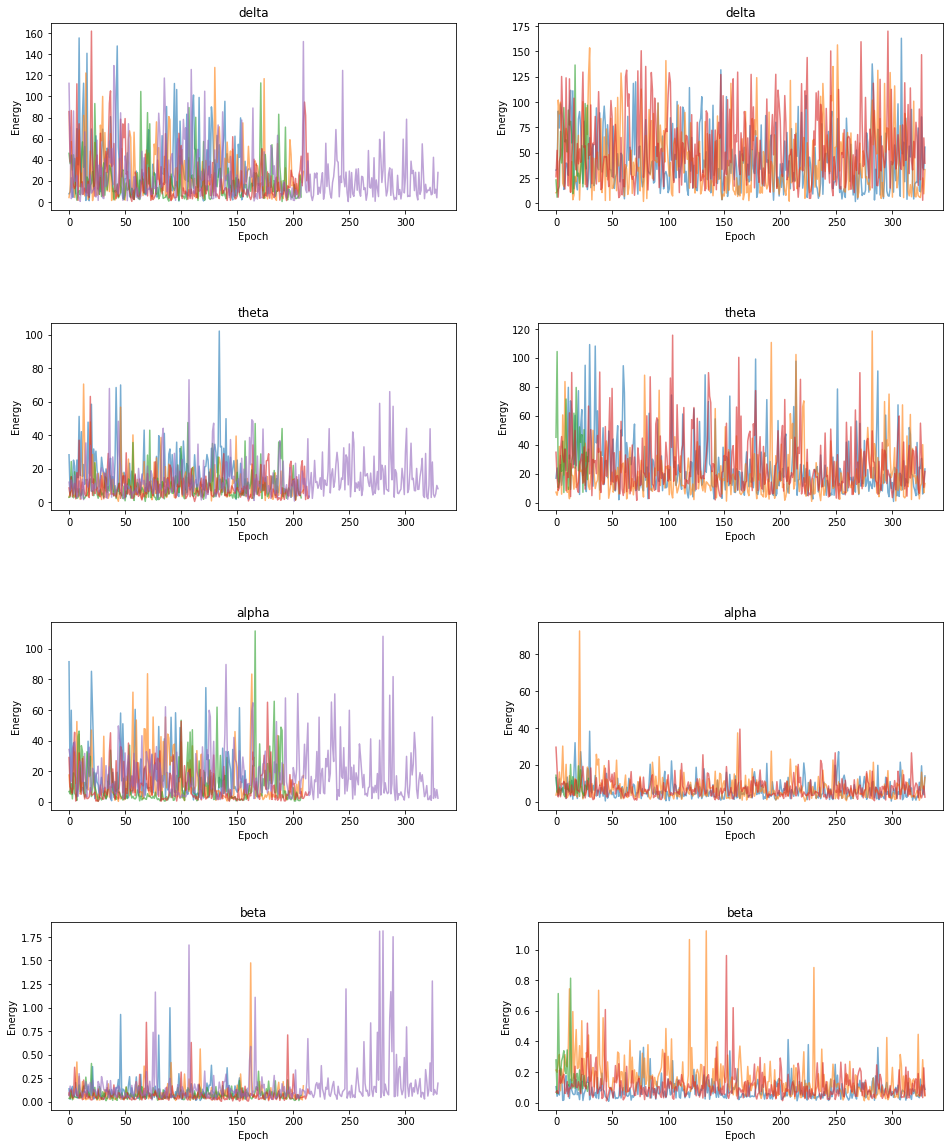

In [15]:
# Plot the band energy for each band. The x-axis is the index of epoch as we advance in time
bands = ['delta','theta','alpha','beta']
fig,ax = plt.subplots(len(bands),2,figsize=(16,20))
fig.subplots_adjust(hspace=0.6)

for b in eyes_closed_bandpower:
    for i, a in enumerate(ax[:,0]):
        c = 'r'
        a.plot(b[10:340,:,i].reshape(-1), alpha=0.6)
        a.set_title(bands[i])
        a.set_xlabel('Epoch')
        a.set_ylabel('Energy')

for b in work_bandpower:
    for i, a in enumerate(ax[:,1]):
        c = 'g'
        a.plot(b[10:340,:,i].reshape(-1), alpha=0.6)
        a.set_title(bands[i])
        a.set_xlabel('Epoch')
        a.set_ylabel('Energy')

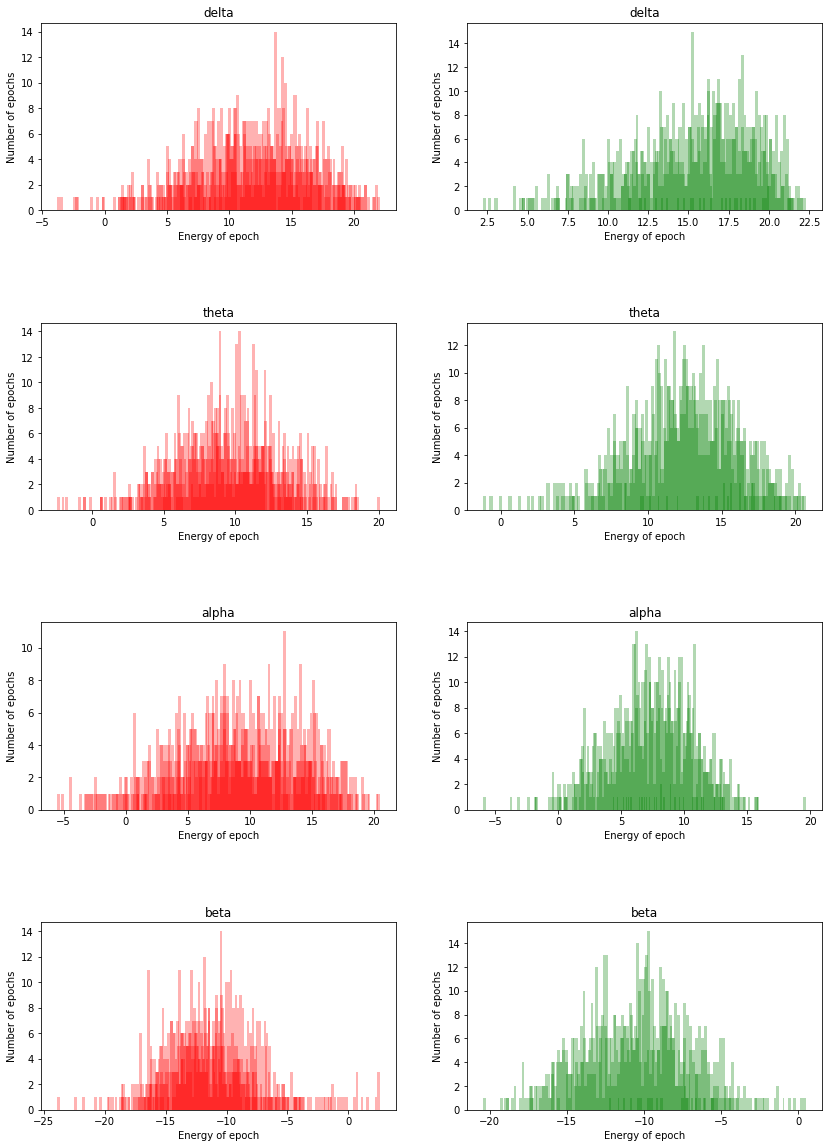

In [16]:
# Plot the histogram of band energy to visualize the distribution of energy of each band
fig,ax = plt.subplots(len(bands),2,figsize=(14,20))
fig.subplots_adjust(hspace=0.6)

import numpy as np
for b in eyes_closed_bandpower:
    c = 'r'
    for i, a in enumerate(ax[:,0]):
        a.hist(10*np.log10(b[10:340,:,i].reshape(-1)), color=c,bins=100,
                       density=False, alpha=0.3)
        a.set_title(bands[i])
        a.set_xlabel('Energy of epoch')
        a.set_ylabel('Number of epochs')
        
for b in work_bandpower:
    c = 'g'
    for i, a in enumerate(ax[:,1]):
        a.hist(10*np.log10(b[10:340,:,i].reshape(-1)), color=c,bins=100,
                       density=False, alpha=0.3)
        a.set_title(bands[i])
        a.set_xlabel('Energy of epoch')
        a.set_ylabel('Number of epochs')

# Modeling
Let's model the bandpower of each epoch as a random variable with a certain probability distribution (pdf). We will model the pdf using a GMM. The GMM can be trained using the Expectation maximization method, available readily through scikit-learn.

In [17]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Convert each band into a one dimensional array
eyes_closed_theta = []
work_theta = []
band_ = 1
for b in eyes_closed_bandpower:
    eyes_closed_theta.append(b[:,0,band_])
    
for b in work_bandpower:
    work_theta.append(b[:,0,band_])


# Fit the GMM
eyes_closed_gmm_classifier = []
work_gmm_classifier = []
for b in eyes_closed_theta:
    eyes_closed_gmm_classifier.append(GaussianMixture(n_components=2).fit(20*np.log10(b.reshape(-1,1))))
    
for b in work_theta:
    work_gmm_classifier.append(GaussianMixture(n_components=2).fit(20*np.log10(b.reshape(-1,1))))

In [18]:
eyes_closed_bandpower[1].shape

(220, 1, 5)

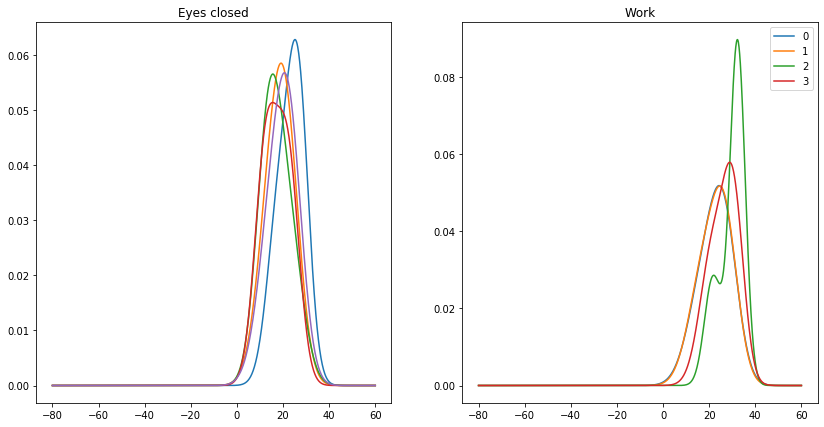

In [19]:
# Let's plot these GMMs
eyes_closed_y = []
work_y = []
x = np.linspace(-80, 60, 1000)
for g in eyes_closed_gmm_classifier:
    eyes_closed_y.append(np.exp(g.score_samples(x.reshape(-1,1))))
    
for g in work_gmm_classifier:
    work_y.append(np.exp(g.score_samples(x.reshape(-1,1))))

fig, ax = plt.subplots(1,2,figsize=(14,7))
for idx, _y in enumerate(eyes_closed_y):
    ax[0].plot(x,_y, label=str(idx))
    ax[0].set_title("Eyes closed")

for idx, _y in enumerate(work_y):
    ax[1].plot(x,_y, label=str(idx))
    ax[1].set_title("Work")

plt.legend()


In [20]:
eyes_closed_all = np.vstack(eyes_closed_bandpower)
work_all = np.vstack(work_bandpower)

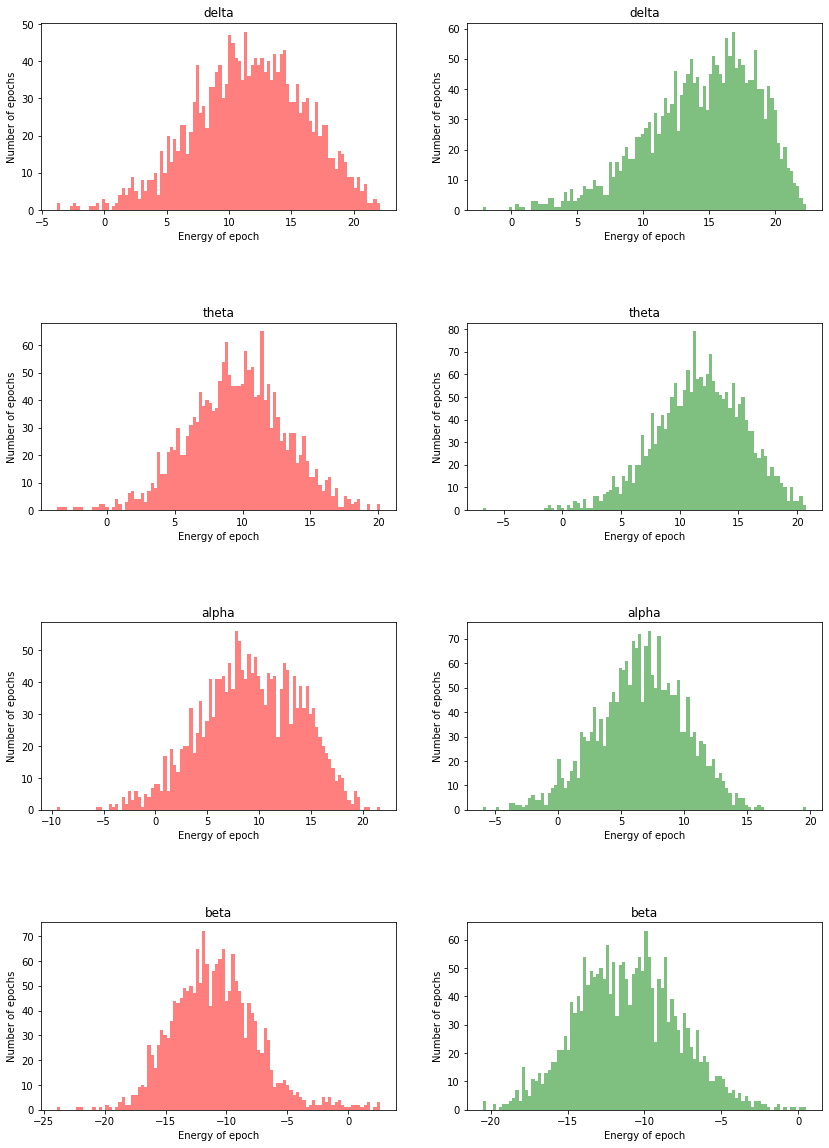

In [21]:
import numpy as np
c = 'r'
fig,ax = plt.subplots(len(bands),2,figsize=(14,20))
fig.subplots_adjust(hspace=0.6)

for i, a in enumerate(ax[:,0]):
    a.hist(10*np.log10(eyes_closed_all[10:,:,i].reshape(-1)), color=c,bins=100,
                   density=False, alpha=0.5)
    a.set_title(bands[i])
    a.set_xlabel('Energy of epoch')
    a.set_ylabel('Number of epochs')

c = 'g'
for i, a in enumerate(ax[:,1]):
    a.hist(10*np.log10(work_all[10:,:,i].reshape(-1)), color=c,bins=100,
                   density=False, alpha=0.5)
    a.set_title(bands[i])
    a.set_xlabel('Energy of epoch')
    a.set_ylabel('Number of epochs')

Shape of eyes_closed_theta_all: (1850,)
Shape of work_theta_all: (2092,)
Shape of eyes_closed_theta_all: (1850,)
Shape of work_theta_all: (2092,)
Shape of eyes_closed_theta_all: (1850,)
Shape of work_theta_all: (2092,)
Shape of eyes_closed_theta_all: (1850,)
Shape of work_theta_all: (2092,)


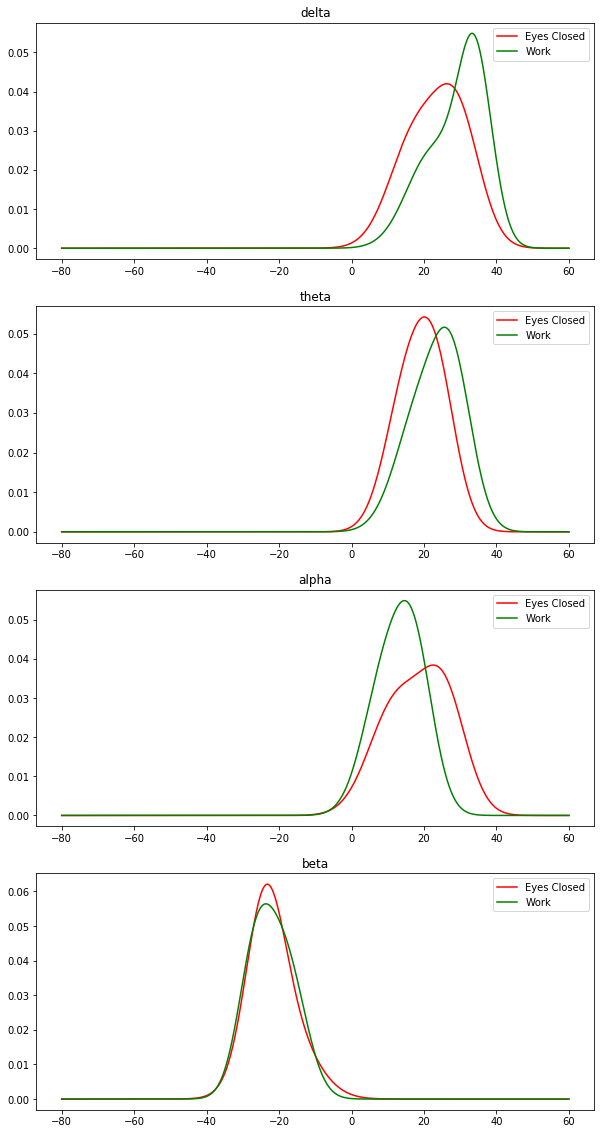

In [22]:
from sklearn.mixture import GaussianMixture
import numpy as np
fig,ax = plt.subplots(4,1,figsize=(10,20))

# Convert each band into a one dimensional array
for band_idx in range(4):
    eyes_closed_theta_all = []
    work_theta_all = []
    band_ = band_idx
    eyes_closed_theta_all = eyes_closed_all[:,0,band_]
    work_theta_all = work_all[:,0,band_]

    print(f"Shape of eyes_closed_theta_all: {eyes_closed_theta_all.shape}")
    print(f"Shape of work_theta_all: {work_theta_all.shape}")

    eyes_closed_gmm_classifier = GaussianMixture(n_components=2).fit(20*np.log10(eyes_closed_theta_all.reshape(-1,1)))
    work_gmm_classifier = GaussianMixture(n_components=2).fit(20*np.log10(work_theta_all.reshape(-1,1)))

    # Let's plot these GMMs
    x = np.linspace(-80, 60, 1000)
    eyes_closed_y = np.exp(eyes_closed_gmm_classifier.score_samples(x.reshape(-1,1)))
    work_y = np.exp(work_gmm_classifier.score_samples(x.reshape(-1,1)))

    ax[band_idx].plot(x,eyes_closed_y,c='r',label='Eyes Closed')
    ax[band_idx].plot(x,work_y,c='g',label='Work')
    ax[band_idx].set_title(bands[band_idx])
    ax[band_idx].legend()

